In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, median_absolute_error

Prepare The Data:

In [22]:
data = pd.read_excel("Coffee Shop Sales.xlsx")

In [23]:
data.dtypes
data["month"] = pd.to_datetime(data["transaction_date"], format="%Y-%m-%d").dt.month

In [24]:
data.dtypes
data["hour"] = pd.to_datetime(data["transaction_time"], format="%H:%M:%S").dt.hour

EDA:

In [25]:
data.info

<bound method DataFrame.info of         transaction_id transaction_date transaction_time  transaction_qty  \
0                    1       2023-01-01         07:06:11                2   
1                    2       2023-01-01         07:08:56                2   
2                    3       2023-01-01         07:14:04                2   
3                    4       2023-01-01         07:20:24                1   
4                    5       2023-01-01         07:22:41                2   
...                ...              ...              ...              ...   
149111          149452       2023-06-30         20:18:41                2   
149112          149453       2023-06-30         20:25:10                2   
149113          149454       2023-06-30         20:31:34                1   
149114          149455       2023-06-30         20:57:19                1   
149115          149456       2023-06-30         20:57:19                2   

        store_id   store_location  product_

In [26]:
data.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
month                        int32
hour                         int32
dtype: object

In [27]:
mean = np.mean(data["unit_price"])
median = np.median(data["unit_price"])

Text(0.5, 1.0, 'Price Line')

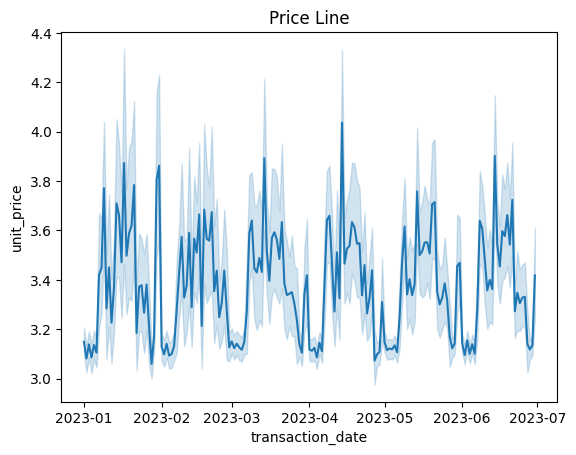

In [28]:
sns.lineplot(x=data["transaction_date"], y=data["unit_price"])
plt.title("Price Line")

Text(0.5, 1.0, 'Store Location/Unit Price')

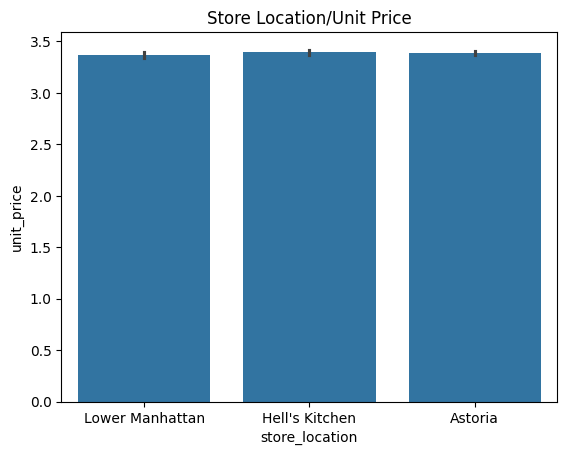

In [29]:
sns.barplot(x=data["store_location"], y=data["unit_price"])
plt.title("Store Location/Unit Price")

Text(0.5, 1.0, 'Product Category/Unit Price')

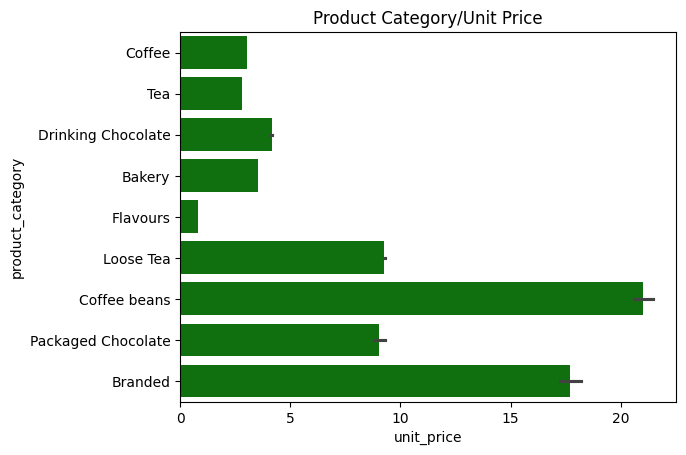

In [30]:
sns.barplot(y=data["product_category"], x=data["unit_price"], color="green")
plt.title("Product Category/Unit Price")

In [31]:
store_location_encoder = LabelEncoder()
data["store_location"] = store_location_encoder.fit_transform(data["store_location"])
data["store_location"]

0         2
1         2
2         2
3         2
4         2
         ..
149111    1
149112    1
149113    1
149114    1
149115    1
Name: store_location, Length: 149116, dtype: int32

In [32]:
product_category_encoder = LabelEncoder()
data["product_category"] = product_category_encoder.fit_transform(data["product_category"])
data["product_category"]

0         2
1         8
2         4
3         2
4         8
         ..
149111    8
149112    8
149113    8
149114    2
149115    5
Name: product_category, Length: 149116, dtype: int32

In [33]:
product_type_encoder = LabelEncoder()
data["product_type"] = product_type_encoder.fit_transform(data["product_type"])

In [34]:
product_detail_encoder = LabelEncoder()
data["product_detail"] = product_detail_encoder.fit_transform(data["product_detail"])

Text(0.5, 1.0, 'Vars HeatMap')

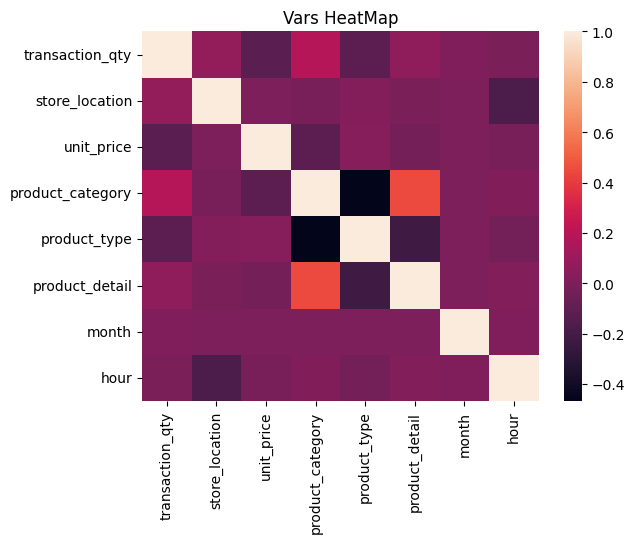

In [35]:
sns.heatmap(data=data.drop(columns=["transaction_date", "transaction_id", "transaction_time", "store_id", "product_id"]).corr())
plt.title("Vars HeatMap")

Prepare The Model:

In [36]:
X = data.drop(columns=["transaction_date", "transaction_id", "transaction_time", "store_id", "product_id", "unit_price"])
y = data["unit_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, train_size=0.7, shuffle=True)

In [37]:
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rfr', RandomForestRegressor())
])

In [38]:
params = {"rfr__max_depth": [12, 18], "rfr__n_estimators": [50, 40]}
grid_model = RandomizedSearchCV(model, param_distributions=params)
grid_model.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('rfr', RandomForestRegressor())]),
                   param_distributions={'rfr__max_depth': [12, 18],
                                        'rfr__n_estimators': [50, 40]})

In [39]:
grid_model.best_score_
grid_model.best_params_
finall_model = grid_model.best_estimator_

In [40]:
predictions = finall_model.predict(X_test)

In [41]:
mae = mean_absolute_error(y_true=y_test, y_pred=predictions)
dae = median_absolute_error(y_true=y_test, y_pred=predictions)
mae

0.012859959585957564

<Axes: title={'center': 'True/Predictions'}, xlabel='true', ylabel='pred'>

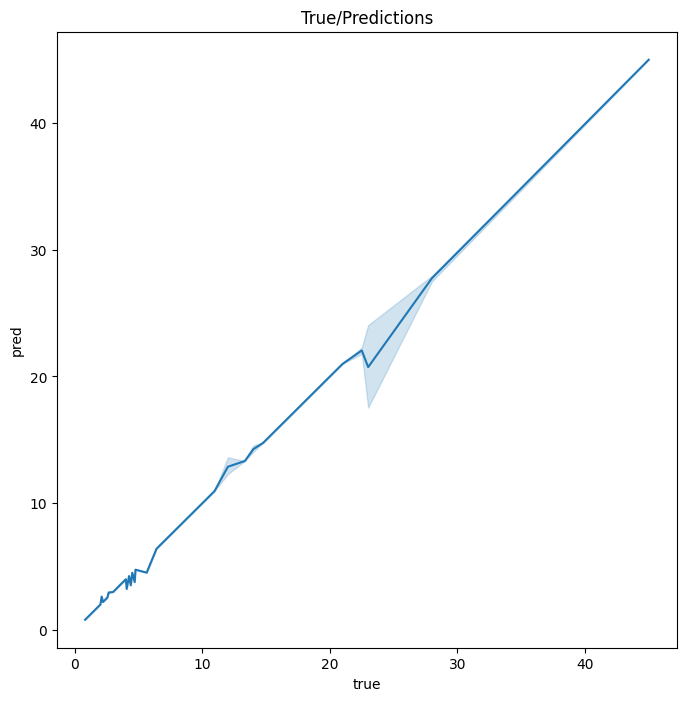

In [42]:
data_ = {'true': y_test, 'pred': predictions}
results = pd.DataFrame(data_)

plt.figure(figsize=(8, 8))
plt.title("True/Predictions")
sns.lineplot(data=data_, x="true", y="pred")